# ELO MERCHANT CATEGORY RECOMMENDATION 
### COMPETITION ON KAGGLE
## Outliers with target < -30
### 28-12-2018

In [1]:
## Variables specific for competition

ID = 'card_id'                                            
TARGET = 'target'    

RAW_DIRECTORY = 'C:/Users/judit/Documents/learning/kaggle/Elo_201812/rawdata/'  
DIRECTORY = 'C:/Users/judit/Documents/learning/kaggle/Elo_201812/data/'
HIST_TRANS_FILE = RAW_DIRECTORY + 'historical_transactions.csv'
MERCHANTS_FILE = RAW_DIRECTORY + 'merchants.csv'
NEW_MERCH_TRANS_FILE = RAW_DIRECTORY + 'new_merchant_transactions.csv'
TRAIN_FILE = RAW_DIRECTORY + 'train.csv'    
TEST_FILE = RAW_DIRECTORY +'test.csv'
SAMPLE_SUBMISSION_FILE = RAW_DIRECTORY + 'sample_submission.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
#import missingno
import pickle

random.seed(1)

In [3]:
train = pd.read_csv(TRAIN_FILE)
mer = pd.read_csv(MERCHANTS_FILE)
hist = pd.read_csv(HIST_TRANS_FILE)
new = pd.read_csv(NEW_MERCH_TRANS_FILE)

In [4]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [5]:
train['start_year'] = train['first_active_month'].apply(lambda x : int(x[:4]))
train['start_month'] = train['first_active_month'].apply(lambda x : int(x[5:]))
train['num_months'] = (2018 - train['start_year']) * 12 + (13 - train['start_month'])

train['card_id_decimal'] = train['card_id'].apply(lambda s : int(s[5:], 16))

train['is_outlier'] = train['target'].apply(lambda x : 1 if x < -30 else 0)

train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,num_months,card_id_decimal,is_outlier
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,2017,6,19,629783156055,0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,2017,1,24,261997498959,0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,2016,8,29,920094897869,0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,2017,9,16,104914905345,0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,2017,11,14,883642076594,0


In [6]:
train[train['is_outlier'] == 1].head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,num_months,card_id_decimal,is_outlier
64,2017-09,C_ID_8186f3fcc1,3,1,1,-33.219281,2017,9,16,556314918081,1
92,2015-05,C_ID_b9379a30ea,3,3,1,-33.219281,2015,5,44,795501801706,1
125,2015-10,C_ID_e9120f535c,3,3,1,-33.219281,2015,10,39,1001030374236,1
151,2017-03,C_ID_65715cb80d,4,2,0,-33.219281,2017,3,22,435693598733,1
225,2017-01,C_ID_ae77d244b6,2,1,0,-33.219281,2017,1,24,749334578358,1


In [7]:
train[train['is_outlier'] == 1].index

Int64Index([    64,     92,    125,    151,    225,    248,    254,    386,
               467,    515,
            ...
            200751, 200815, 200831, 201012, 201050, 201169, 201262, 201368,
            201519, 201521],
           dtype='int64', length=2207)

In [8]:
train.shape[0] / train[train['is_outlier'] == 1].shape[0]

91.48935206162211

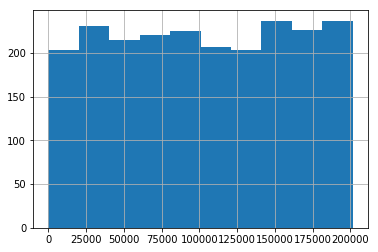

In [14]:
outlier_indices = pd.Series(train[train['is_outlier'] == 1].index)
outlier_indices.hist(bins = 10)

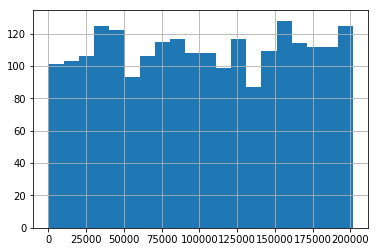

In [15]:
outlier_indices.hist(bins = 20)

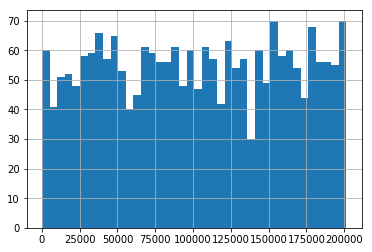

In [16]:
outlier_indices.hist(bins = 40)

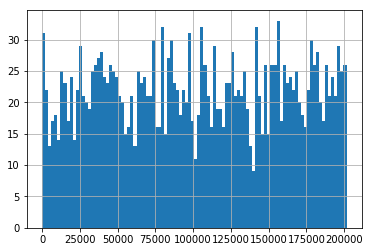

In [17]:
outlier_indices.hist(bins = 100)

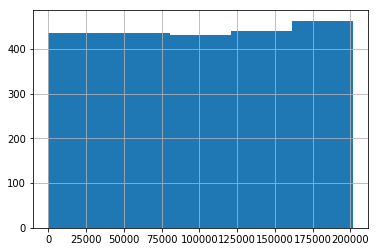

In [18]:
outlier_indices.hist(bins = 5)

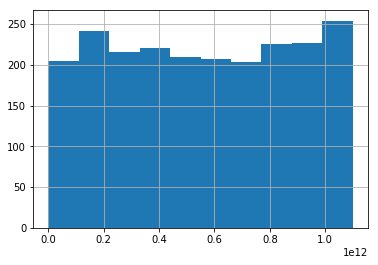

In [19]:
train.loc[train['is_outlier'] == 1, 'card_id_decimal'].hist()

In [20]:
mer.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [21]:
mer.groupby('state_id').city_id.nunique()

state_id
-1      1
 1      2
 2      3
 3      5
 4     11
 5     18
 6      1
 7     12
 8      3
 9     79
 10     3
 11     5
 12    11
 13     6
 14     5
 15    30
 16    29
 17     3
 18     3
 19    17
 20    14
 21    17
 22     2
 23     5
 24    10
Name: city_id, dtype: int64

In [22]:
## I think that state_id == -1 for foreign purchases
## city_id == -1 may refer to other/unknown cities, so it may be assigned to more than one states

In [24]:
state_cnts = mer.groupby('city_id').state_id.nunique()
state_cnts[state_cnts > 1]

city_id
-1    25
Name: state_id, dtype: int64

In [25]:
## Only city_id == -1 is assigned to more than one states, and in every state there's a city with city_id = -1.

In [26]:
print('Number of merchants in a foreign country:', mer[mer['state_id'] == -1].shape[0])
print('Number of merchants in Brazil:', mer[mer['state_id'] > -1].shape[0])

Number of merchants in a foreign country: 11887
Number of merchants in Brazil: 322809


In [27]:
data = train.merge(hist, how = 'left', on = 'card_id')
print(data.shape)
data.head()

(18030009, 24)


,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,num_months,card_id_decimal,...,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,2017,6,19,629783156055,...,0,A,195,M_ID_cc72dac895,-3,-0.506033,2017-11-25 16:37:11,1.0,9,34
1,2017-06,C_ID_92a2005557,5,2,1,-0.820283,2017,6,19,629783156055,...,0,A,278,M_ID_c9c0f1cb3f,-7,-0.722114,2017-07-16 12:21:00,1.0,9,37
2,2017-06,C_ID_92a2005557,5,2,1,-0.820283,2017,6,19,629783156055,...,0,A,683,M_ID_36f9e41993,-6,-0.726171,2017-08-10 21:01:16,1.0,9,34
3,2017-06,C_ID_92a2005557,5,2,1,-0.820283,2017,6,19,629783156055,...,0,A,309,M_ID_b790230ee9,-2,-0.610167,2017-12-15 12:06:58,1.0,9,21
4,2017-06,C_ID_92a2005557,5,2,1,-0.820283,2017,6,19,629783156055,...,0,A,278,M_ID_ab67f6c982,-7,-0.307232,2017-07-08 15:13:18,1.0,9,37


In [29]:
data_outliers = data[data['is_outlier'] == 1].copy()
data_inliers = data[data['is_outlier'] == 0].copy()
data_outliers.shape, data_inliers.shape

((180105, 24), (17849904, 24))

In [30]:
data_outliers[data_outliers['state_id'] == -1].shape[0] / data_outliers.shape[0]

0.20565781072152356

In [31]:
data_inliers[data_inliers['state_id'] == -1].shape[0] / data_inliers.shape[0]

0.08965605641352468

In [32]:
## Much more foreign purchases in the set of outliers than among inlier purchases!

In [33]:
data_outliers[data_outliers['installments'] == 999].shape[0] / data_outliers.shape[0]

1.6656950112434415e-05

In [34]:
data_inliers[data_inliers['installments'] == 999].shape[0] / data_inliers.shape[0]

5.770339157006111e-06

In [35]:
## Much more installments == 999 among outliers!

In [37]:
data_outliers.groupby('installments').card_id.nunique() / data_outliers.card_id.nunique()

installments
-1      0.149071
 0      0.371545
 1      0.824196
 2      0.555052
 3      0.529225
 4      0.326235
 5      0.253738
 6      0.246942
 7      0.043498
 8      0.054372
 9      0.019483
 10     0.216584
 11     0.004078
 12     0.125510
 999    0.001359
Name: card_id, dtype: float64

In [38]:
data_inliers.groupby('installments').card_id.nunique() / data_inliers.card_id.nunique()

installments
-1      0.230194
 0      0.504822
 1      0.737429
 2      0.405348
 3      0.381108
 4      0.236838
 5      0.178128
 6      0.181383
 7      0.024100
 8      0.041881
 9      0.012894
 10     0.162836
 11     0.001998
 12     0.074288
 999    0.000506
Name: card_id, dtype: float64

In [39]:
data_outliers.groupby('installments').card_id.nunique()

installments
-1       329
 0       820
 1      1819
 2      1225
 3      1168
 4       720
 5       560
 6       545
 7        96
 8       120
 9        43
 10      478
 11        9
 12      277
 999       3
Name: card_id, dtype: int64

In [40]:
data_inliers.groupby('installments').card_id.nunique()

installments
-1       45972
 0      100818
 1      147272
 2       80952
 3       76111
 4       47299
 5       35574
 6       36224
 7        4813
 8        8364
 9        2575
 10      32520
 11        399
 12      14836
 999       101
Name: card_id, dtype: int64

In [41]:
data_outliers.groupby('state_id').card_id.nunique()

state_id
-1     1447
 1       67
 2       80
 3       99
 4      190
 5      385
 6        4
 7      106
 8       33
 9     1757
 10      41
 11     111
 12      88
 13      69
 14      43
 15     390
 16     364
 17      29
 18     118
 19     159
 20     175
 21     169
 22     137
 23      26
 24      58
Name: card_id, dtype: int64

In [42]:
data_inliers.groupby('state_id').card_id.nunique()

state_id
-1     102336
 1       5844
 2       7861
 3      10110
 4      15560
 5      40105
 6        298
 7      11663
 8       3764
 9     164755
 10      2795
 11     10077
 12      5999
 13      6997
 14      3878
 15     32024
 16     31832
 17      3798
 18     11620
 19     17534
 20     18847
 21     19479
 22     11344
 23      2597
 24      4145
Name: card_id, dtype: int64

In [43]:
data_outliers.groupby('card_id').state_id.nunique().reset_index().sort_values('state_id', ascending = False)

,card_id,state_id
1854,C_ID_db26870a7a,13
1223,C_ID_909bc03536,12
1743,C_ID_ce3218f92b,12
1363,C_ID_a1de8d1def,12
1062,C_ID_7c2f4445cb,11
1083,C_ID_7ed8320aed,10
999,C_ID_749cae3be6,9
1779,C_ID_d24bbfba24,9
1691,C_ID_c91243f1ff,9
43,C_ID_03e95ac152,9


In [44]:
data_inliers.groupby('card_id').state_id.nunique().reset_index().sort_values('state_id', ascending = False)

,card_id,state_id
80922,C_ID_678d30fccd,20
151328,C_ID_c21b660334,20
11525,C_ID_0ec88e720f,19
19953,C_ID_1988bcbc37,19
142424,C_ID_b69186fcc7,19
110844,C_ID_8e19db6a5f,19
62123,C_ID_4f8a6fdcdc,19
47239,C_ID_3c63679819,18
158515,C_ID_cb6cc4235f,18
161695,C_ID_cf7fa278de,18


In [48]:
data_outliers.groupby('card_id').state_id.nunique().reset_index().describe()

,state_id
count,2207.000000
mean,2.784323
std,1.448314
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,13.000000


In [49]:
data_inliers.groupby('card_id').state_id.nunique().reset_index().describe()

,state_id
count,199710.000000
mean,2.730269
std,1.517389
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,20.000000


In [50]:
data_outliers[data_outliers['state_id'] > -1].groupby('card_id').state_id.nunique().reset_index().describe()

,state_id
count,2139.000000
mean,2.196353
std,1.306874
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,12.000000


In [51]:
data_inliers[data_inliers['state_id'] > -1].groupby('card_id').state_id.nunique().reset_index().describe()

,state_id
count,196175.000000
mean,2.257811
std,1.365098
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,19.000000


In [53]:
newdata = train.merge(new, how = 'left', on = 'card_id')
print(newdata.shape)
newdata.head()

(1241616, 24)


,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,num_months,card_id_decimal,...,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,2017,6,19,629783156055,...,0.0,A,80.0,M_ID_98b342c0e3,1.0,-0.491457,2018-03-30 10:30:32,1.0,9.0,37.0
1,2017-06,C_ID_92a2005557,5,2,1,-0.820283,2017,6,19,629783156055,...,0.0,A,80.0,M_ID_28a21ea733,2.0,-0.666561,2018-04-06 10:55:08,1.0,9.0,37.0
2,2017-06,C_ID_92a2005557,5,2,1,-0.820283,2017,6,19,629783156055,...,0.0,A,278.0,M_ID_20dce166b9,1.0,-0.635246,2018-03-29 15:38:10,1.0,9.0,37.0
3,2017-06,C_ID_92a2005557,5,2,1,-0.820283,2017,6,19,629783156055,...,0.0,A,842.0,M_ID_f7796994d1,2.0,-0.581180,2018-04-09 13:56:50,1.0,9.0,37.0
4,2017-06,C_ID_92a2005557,5,2,1,-0.820283,2017,6,19,629783156055,...,0.0,A,783.0,M_ID_0703c10cc0,1.0,-0.296112,2018-03-12 16:49:03,1.0,9.0,19.0


In [54]:
newdata_outliers = newdata[newdata['is_outlier'] == 1].copy()
newdata_inliers = newdata[newdata['is_outlier'] == 0].copy()
newdata_outliers.shape, newdata_inliers.shape

((8035, 24), (1233581, 24))

In [55]:
newdata_outliers[newdata_outliers['state_id'] == -1].shape[0] / newdata_outliers.shape[0]

0.10665836963285626

In [56]:
newdata_inliers[newdata_inliers['state_id'] == -1].shape[0] / newdata_inliers.shape[0]

0.05528133134346265

In [57]:
newdata_outliers[newdata_outliers['installments'] == 999].shape[0] / newdata_outliers.shape[0]

0.0

In [58]:
newdata_inliers[newdata_inliers['installments'] == 999].shape[0] / newdata_inliers.shape[0]

8.106480239238445e-07

In [59]:
newdata_outliers.groupby('installments').card_id.nunique() / newdata_outliers.card_id.nunique()

installments
-1.0     0.075668
 0.0     0.249660
 1.0     0.434527
 2.0     0.101495
 3.0     0.100589
 4.0     0.036701
 5.0     0.023561
 6.0     0.032170
 7.0     0.002719
 8.0     0.004531
 9.0     0.000906
 10.0    0.022202
 12.0    0.009062
Name: card_id, dtype: float64

In [60]:
newdata_inliers.groupby('installments').card_id.nunique() / newdata_inliers.card_id.nunique()

installments
-1.0      0.125647
 0.0      0.433459
 1.0      0.427380
 2.0      0.125617
 3.0      0.106820
 4.0      0.041660
 5.0      0.027074
 6.0      0.028962
 7.0      0.002619
 8.0      0.004862
 9.0      0.001477
 10.0     0.025161
 11.0     0.000200
 12.0     0.008442
 999.0    0.000005
Name: card_id, dtype: float64

In [61]:
newdata_outliers.groupby('installments').card_id.nunique()

installments
-1.0     167
 0.0     551
 1.0     959
 2.0     224
 3.0     222
 4.0      81
 5.0      52
 6.0      71
 7.0       6
 8.0      10
 9.0       2
 10.0     49
 12.0     20
Name: card_id, dtype: int64

In [62]:
newdata_inliers.groupby('installments').card_id.nunique()

installments
-1.0      25093
 0.0      86566
 1.0      85352
 2.0      25087
 3.0      21333
 4.0       8320
 5.0       5407
 6.0       5784
 7.0        523
 8.0        971
 9.0        295
 10.0      5025
 11.0        40
 12.0      1686
 999.0        1
Name: card_id, dtype: int64

In [63]:
newdata_outliers.groupby('state_id').card_id.nunique()

state_id
-1.0     472
 1.0      25
 2.0      38
 3.0      36
 4.0      83
 5.0     117
 6.0       1
 7.0      43
 8.0      16
 9.0     746
 10.0     18
 11.0     52
 12.0     43
 13.0     41
 14.0     15
 15.0    178
 16.0    167
 17.0     11
 18.0     38
 19.0     81
 20.0     67
 21.0     69
 22.0     62
 23.0     12
 24.0     23
Name: card_id, dtype: int64

In [64]:
newdata_inliers.groupby('state_id').card_id.nunique()

state_id
-1.0     37197
 1.0      2966
 2.0      4680
 3.0      5433
 4.0      8595
 5.0     17404
 6.0       119
 7.0      6539
 8.0      1883
 9.0     94324
 10.0     1900
 11.0     5881
 12.0     3507
 13.0     4748
 14.0     2007
 15.0    18420
 16.0    19394
 17.0     1597
 18.0     4360
 19.0    10766
 20.0     9989
 21.0     9713
 22.0     6928
 23.0     1626
 24.0     2317
Name: card_id, dtype: int64

In [65]:
newdata_outliers.groupby('card_id').state_id.nunique().reset_index().sort_values('state_id', ascending = False)

,card_id,state_id
1753,C_ID_cf6aff2a4e,8
1743,C_ID_ce3218f92b,7
2201,C_ID_fef63e8e00,7
1825,C_ID_d845ae8662,6
43,C_ID_03e95ac152,6
398,C_ID_2e9788ec88,6
933,C_ID_6c61872039,5
567,C_ID_419e396b0e,5
1400,C_ID_a682049c9b,5
1319,C_ID_9ca53fe568,5


In [66]:
newdata_inliers.groupby('card_id').state_id.nunique().reset_index().sort_values('state_id', ascending = False)

,card_id,state_id
151328,C_ID_c21b660334,14
31138,C_ID_27d0fd5d14,12
89369,C_ID_725d7b955a,12
143466,C_ID_b7ebee6539,12
142424,C_ID_b69186fcc7,11
134083,C_ID_abff8799d2,11
26521,C_ID_21e7ddbe5c,11
147358,C_ID_bce92179dc,10
55165,C_ID_46859886cf,10
60688,C_ID_4db292688e,10


In [67]:
newdata_outliers.groupby('card_id').state_id.nunique().reset_index().describe()

,state_id
count,2207.000000
mean,1.111917
std,0.953915
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,8.000000


In [68]:
newdata_inliers.groupby('card_id').state_id.nunique().reset_index().describe()

,state_id
count,199710.000000
mean,1.413515
std,0.960047
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,14.000000


In [69]:
newdata_outliers[newdata_outliers['state_id'] > -1].groupby('card_id').state_id.nunique().reset_index().describe()

,state_id
count,1511.000000
mean,1.311714
std,0.646018
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,7.000000


In [70]:
newdata_inliers[newdata_inliers['state_id'] > -1].groupby('card_id').state_id.nunique().reset_index().describe()

,state_id
count,172843.000000
mean,1.418027
std,0.742276
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,13.000000


In [71]:
newdata_outliers[newdata_outliers['state_id'].notnull()].groupby('card_id').state_id.nunique().reset_index().describe()

,state_id
count,1633.000000
mean,1.502756
std,0.801438
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000


In [72]:
newdata_inliers[newdata_inliers['state_id'].notnull()].groupby('card_id').state_id.nunique().reset_index().describe()

,state_id
count,178353.000000
mean,1.582777
std,0.874158
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,14.000000


In [74]:
data_outliers['foreign_purchase'] = data_outliers['state_id'].apply(lambda x : 1 if x == -1 else 0)
data_inliers['foreign_purchase'] = data_inliers['state_id'].apply(lambda x : 1 if x == -1 else 0)
newdata_outliers['foreign_purchase'] = newdata_outliers['state_id'].apply(lambda x : 1 if x == -1 else 0)
newdata_inliers['foreign_purchase'] = newdata_inliers['state_id'].apply(lambda x : 1 if x == -1 else 0)

data_outliers.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,num_months,card_id_decimal,...,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,foreign_purchase
6986,2017-09,C_ID_8186f3fcc1,3,1,1,-33.219281,2017,9,16,556314918081,...,B,705,M_ID_f15a843a23,-1,-0.618055,2018-01-06 11:57:23,5.0,20,33,0
6987,2017-09,C_ID_8186f3fcc1,3,1,1,-33.219281,2017,9,16,556314918081,...,C,683,M_ID_7de9fe0811,-4,-0.431381,2017-10-08 02:54:59,NaN,-1,34,1
6988,2017-09,C_ID_8186f3fcc1,3,1,1,-33.219281,2017,9,16,556314918081,...,B,690,M_ID_fbd2a9a388,-5,-0.611714,2017-09-30 21:07:14,5.0,20,1,0
6989,2017-09,C_ID_8186f3fcc1,3,1,1,-33.219281,2017,9,16,556314918081,...,B,705,M_ID_96fad20d15,-2,-0.405535,2017-12-26 16:50:51,5.0,20,33,0
6990,2017-09,C_ID_8186f3fcc1,3,1,1,-33.219281,2017,9,16,556314918081,...,B,842,M_ID_7e872c40f6,-1,-0.623690,2018-01-13 21:31:40,5.0,20,37,0


In [80]:
df1 = data_outliers[data_outliers['state_id'].notnull()].groupby(['card_id', 'foreign_purchase']
                                                                ).purchase_amount.sum().reset_index()
df1.head()

,card_id,foreign_purchase,purchase_amount
0,C_ID_001982552a,0,-50.451634
1,C_ID_001982552a,1,-2.444994
2,C_ID_0029d52418,0,-14.880800
3,C_ID_0029d52418,1,-256.525517
4,C_ID_0046b2b355,0,-15.376028


In [82]:
df2 = newdata_outliers[newdata_outliers['state_id'].notnull()].groupby(['card_id', 'foreign_purchase']
                                                                      ).purchase_amount.sum().reset_index()

df_outliers = df1.merge(df2, how = 'outer', on = ['card_id', 'foreign_purchase'])

df_outliers.head()

,card_id,foreign_purchase,purchase_amount_x,purchase_amount_y
0,C_ID_001982552a,0,-50.451634,-5.314727
1,C_ID_001982552a,1,-2.444994,-0.537739
2,C_ID_0029d52418,0,-14.880800,NaN
3,C_ID_0029d52418,1,-256.525517,-0.701828
4,C_ID_0046b2b355,0,-15.376028,-0.671775


In [83]:
df3 = data_inliers[data_inliers['state_id'].notnull()].groupby(['card_id', 'foreign_purchase']
                                                                ).purchase_amount.sum().reset_index()
df4 = newdata_inliers[newdata_inliers['state_id'].notnull()].groupby(['card_id', 'foreign_purchase']
                                                                      ).purchase_amount.sum().reset_index()

df_inliers = df3.merge(df4, how = 'outer', on = ['card_id', 'foreign_purchase'])

df_inliers.head()

,card_id,foreign_purchase,purchase_amount_x,purchase_amount_y
0,C_ID_00007093c1,0,-56.806000,-1.328524
1,C_ID_00007093c1,1,-20.039041,NaN
2,C_ID_0001506ef0,0,-34.601879,-1.447354
3,C_ID_000183fdda,0,-71.717965,-6.590778
4,C_ID_000183fdda,1,2.880026,NaN


In [84]:
df_outliers.describe()

,foreign_purchase,purchase_amount_x,purchase_amount_y
count,3639.000000,3586.000000,1983.000000
mean,0.410552,7.720302,-2.001150
std,0.492002,1491.689880,2.978252
min,0.000000,-492.920873,-24.525942
25%,0.000000,-38.674079,-2.763098
50%,0.000000,-15.371633,-1.294865
75%,1.000000,-4.310227,-0.671775
max,1.000000,87125.082472,37.746267


In [85]:
df_inliers.describe()

,foreign_purchase,purchase_amount_x,purchase_amount_y
count,305163.000000,2.985110e+05,210040.000000
mean,0.354830,9.664983e+00,-3.187579
std,0.478463,1.105996e+04,4.157205
min,0.000000,-2.088013e+03,-70.078602
25%,0.000000,-4.268620e+01,-4.523344
50%,0.000000,-1.428174e+01,-2.041878
75%,1.000000,-2.870139e+00,-0.722114
max,1.000000,6.010596e+06,109.457455


In [86]:
df_outliers[df_outliers['foreign_purchase'] == 1].describe()

,foreign_purchase,purchase_amount_x,purchase_amount_y
count,1494.0,1447.000000,472.000000
mean,1.0,-14.098721,-0.610470
std,0.0,26.813969,1.975778
min,1.0,-256.525517,-12.155306
25%,1.0,-16.792120,-1.072326
50%,1.0,-5.659255,-0.700326
75%,1.0,-1.446940,-0.491006
max,1.0,104.899057,26.237973


In [87]:
df_inliers[df_inliers['foreign_purchase'] == 1].describe()

,foreign_purchase,purchase_amount_x,purchase_amount_y
count,108281.0,102336.000000,37197.000000
mean,1.0,-5.644445,-0.693150
std,0.0,238.624827,1.871374
min,1.0,-1225.975756,-24.333633
25%,1.0,-7.842442,-0.962749
50%,1.0,-2.236215,-0.701843
75%,1.0,-0.677455,-0.461840
max,1.0,58582.140581,44.534223


In [88]:
df_outliers[df_outliers['foreign_purchase'] == 0].describe()

,foreign_purchase,purchase_amount_x,purchase_amount_y
count,2145.0,2139.000000,1511.000000
mean,0.0,22.480530,-2.435565
std,0.0,1931.343519,3.103477
min,0.0,-492.920873,-24.525942
25%,0.0,-50.742412,-3.320386
50%,0.0,-26.191646,-1.447985
75%,0.0,-10.636607,-0.713173
max,0.0,87125.082472,37.746267


In [89]:
df_inliers[df_inliers['foreign_purchase'] == 0].describe()

,foreign_purchase,purchase_amount_x,purchase_amount_y
count,196882.0,1.961750e+05,172843.000000
mean,0.0,1.765125e+01,-3.724397
std,0.0,1.364198e+04,4.315179
min,0.0,-2.088013e+03,-70.078602
25%,0.0,-6.179129e+01,-5.171810
50%,0.0,-2.754406e+01,-2.657063
75%,0.0,-1.066129e+01,-1.205817
max,0.0,6.010596e+06,109.457455


In [94]:
df_outliers_foreign = df_outliers[df_outliers['foreign_purchase'] == 1].copy()
df_outliers_domestic = df_outliers[df_outliers['foreign_purchase'] == 0].copy()
df_outliers_foreign.head()

,card_id,foreign_purchase,purchase_amount_x,purchase_amount_y
1,C_ID_001982552a,1,-2.444994,-0.537739
3,C_ID_0029d52418,1,-256.525517,-0.701828
6,C_ID_0050fc55c0,1,-1.134982,NaN
10,C_ID_0089a52031,1,-7.675738,-0.634359
15,C_ID_00edc3973c,1,10.901434,NaN


In [95]:
df_outliers_foreign.columns = ['card_id', 'foreign_purchase', 'purchase_amount_hist_foreign', 'purchase_amount_new_foreign']

In [96]:
df_outliers_domestic.columns = ['card_id', 'foreign_purchase', 'purchase_amount_hist_domestic', 'purchase_amount_new_domestic']

In [97]:
df_outliers_foreign.drop('foreign_purchase', inplace = True, axis = 1)
df_outliers_domestic.drop('foreign_purchase', inplace = True, axis = 1)

df_outliers = df_outliers_foreign.merge(df_outliers_domestic, how = 'outer', on = 'card_id')
df_outliers.head()

,card_id,purchase_amount_hist_foreign,purchase_amount_new_foreign,purchase_amount_hist_domestic,purchase_amount_new_domestic
0,C_ID_001982552a,-2.444994,-0.537739,-50.451634,-5.314727
1,C_ID_0029d52418,-256.525517,-0.701828,-14.880800,NaN
2,C_ID_0050fc55c0,-1.134982,NaN,-9.709155,NaN
3,C_ID_0089a52031,-7.675738,-0.634359,-6.223185,-1.012712
4,C_ID_00edc3973c,10.901434,NaN,1.723105,0.088566


In [98]:
df_inliers_foreign = df_inliers[df_inliers['foreign_purchase'] == 1].copy()
df_inliers_domestic = df_inliers[df_inliers['foreign_purchase'] == 0].copy()
df_inliers_foreign.columns = ['card_id', 'foreign_purchase', 'purchase_amount_hist_foreign', 'purchase_amount_new_foreign']
df_inliers_domestic.columns = ['card_id', 'foreign_purchase', 'purchase_amount_hist_domestic', 'purchase_amount_new_domestic']
df_inliers_foreign.drop('foreign_purchase', inplace = True, axis = 1)
df_inliers_domestic.drop('foreign_purchase', inplace = True, axis = 1)
df_inliers = df_inliers_foreign.merge(df_inliers_domestic, how = 'outer', on = 'card_id')
df_inliers.head()

,card_id,purchase_amount_hist_foreign,purchase_amount_new_foreign,purchase_amount_hist_domestic,purchase_amount_new_domestic
0,C_ID_00007093c1,-20.039041,NaN,-56.806000,-1.328524
1,C_ID_000183fdda,2.880026,NaN,-71.717965,-6.590778
2,C_ID_0003be3c83,-13.322250,NaN,-88.577530,-3.441312
3,C_ID_00042d509c,-28.312713,-0.467264,-10.862741,-0.720687
4,C_ID_0004888ddd,-2.963589,NaN,-26.037970,-1.386226


In [99]:
df_outliers.describe()

,purchase_amount_hist_foreign,purchase_amount_new_foreign,purchase_amount_hist_domestic,purchase_amount_new_domestic
count,1447.000000,472.000000,2139.000000,1511.000000
mean,-14.098721,-0.610470,22.480530,-2.435565
std,26.813969,1.975778,1931.343519,3.103477
min,-256.525517,-12.155306,-492.920873,-24.525942
25%,-16.792120,-1.072326,-50.742412,-3.320386
50%,-5.659255,-0.700326,-26.191646,-1.447985
75%,-1.446940,-0.491006,-10.636607,-0.713173
max,104.899057,26.237973,87125.082472,37.746267


In [100]:
df_inliers.describe()

,purchase_amount_hist_foreign,purchase_amount_new_foreign,purchase_amount_hist_domestic,purchase_amount_new_domestic
count,102336.000000,37197.000000,1.961750e+05,172843.000000
mean,-5.644445,-0.693150,1.765125e+01,-3.724397
std,238.624827,1.871374,1.364198e+04,4.315179
min,-1225.975756,-24.333633,-2.088013e+03,-70.078602
25%,-7.842442,-0.962749,-6.179129e+01,-5.171810
50%,-2.236215,-0.701843,-2.754406e+01,-2.657063
75%,-0.677455,-0.461840,-1.066129e+01,-1.205817
max,58582.140581,44.534223,6.010596e+06,109.457455


In [102]:
df_outliers.apply(lambda row : (row['purchase_amount_hist_foreign'] + 3000) / (row['purchase_amount_hist_domestic'
                                                                                  ] + 3000), axis = 1).describe()

count    1379.000000
mean        1.004989
std         0.051280
min         0.033121
25%         1.000105
50%         1.005275
75%         1.013783
max         1.157668
dtype: float64

In [104]:
df_inliers.apply(lambda row : (row['purchase_amount_hist_foreign'] + 3000) / (row['purchase_amount_hist_domestic'
                                                                                  ] + 3000), axis = 1).describe()

count    98801.000000
mean         1.013575
std          0.090586
min          0.017793
25%          1.001424
50%          1.007261
75%          1.019109
max         21.148343
dtype: float64

In [107]:
df_outliers.apply(lambda row : (row['purchase_amount_new_foreign'] + 3000) / (row['purchase_amount_new_domestic'
                                                                                  ] + 3000), axis = 1).describe()

count    350.000000
mean       1.000787
std        0.001595
min        0.987329
25%        1.000004
50%        1.000474
75%        1.001188
max        1.008846
dtype: float64

In [108]:
df_inliers.apply(lambda row : (row['purchase_amount_new_foreign'] + 3000) / (row['purchase_amount_new_domestic'
                                                                                  ] + 3000), axis = 1).describe()

count    31687.000000
mean         1.001261
std          0.001938
min          0.964679
25%          1.000184
50%          1.000860
75%          1.001967
max          1.023667
dtype: float64

In [109]:
df_outliers.apply(lambda row : row['purchase_amount_hist_domestic'] - row['purchase_amount_hist_foreign'], axis = 1).describe()

count     1379.000000
mean        66.407147
std       2399.872644
min       -408.396638
25%        -40.635798
50%        -15.723216
75%         -0.312912
max      87140.081861
dtype: float64

In [110]:
df_inliers.apply(lambda row : row['purchase_amount_hist_domestic'] - row['purchase_amount_hist_foreign'], axis = 1).describe()

count     98801.000000
mean        -19.723774
std        1103.729028
min      -58670.227270
25%         -56.169116
50%         -21.604157
75%          -4.264224
max      165277.323009
dtype: float64

In [111]:
df_outliers.apply(lambda row : row['purchase_amount_new_domestic'] - row['purchase_amount_new_foreign'], axis = 1).describe()

count    350.000000
mean      -2.353616
std        4.784283
min      -26.534235
25%       -3.559506
50%       -1.420659
75%       -0.013107
max       38.492424
dtype: float64

In [112]:
df_inliers.apply(lambda row : row['purchase_amount_new_domestic'] - row['purchase_amount_new_foreign'], axis = 1).describe()

count    31687.000000
mean        -3.765742
std          5.796718
min        -69.343716
25%         -5.887297
50%         -2.576416
75%         -0.552916
max        109.828700
dtype: float64

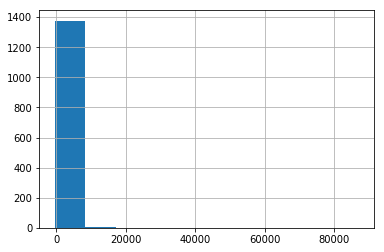

In [130]:
df_outliers.apply(lambda row : row['purchase_amount_hist_domestic'] - row['purchase_amount_hist_foreign'], axis = 1).hist(bins = 10)

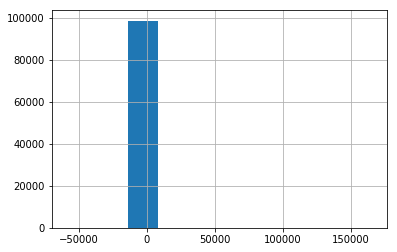

In [133]:
df_inliers.apply(lambda row : row['purchase_amount_hist_domestic'] - row['purchase_amount_hist_foreign'], axis = 1).hist(bins = 10)

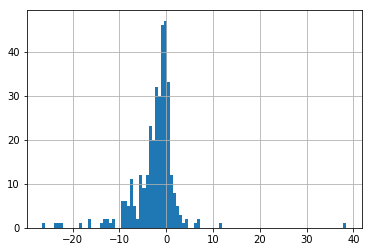

In [121]:
df_outliers.apply(lambda row : row['purchase_amount_new_domestic'] - row['purchase_amount_new_foreign'], axis = 1).hist(bins = 100)

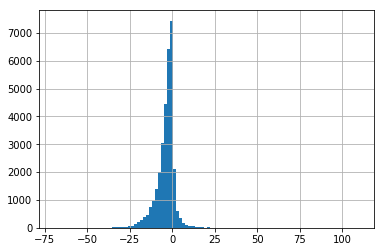

In [120]:
df_inliers.apply(lambda row : row['purchase_amount_new_domestic'] - row['purchase_amount_new_foreign'], axis = 1).hist(bins = 100)

In [135]:
df5 = data_outliers[data_outliers['state_id'].notnull()].groupby(['card_id', 'foreign_purchase']
                                                                ).purchase_amount.size().reset_index()
df6 = newdata_outliers[newdata_outliers['state_id'].notnull()].groupby(['card_id', 'foreign_purchase']
                                                                      ).purchase_amount.size().reset_index()

df_outliers_cnt = df5.merge(df6, how = 'outer', on = ['card_id', 'foreign_purchase'])

df_outliers_cnt.head()

,card_id,foreign_purchase,purchase_amount_x,purchase_amount_y
0,C_ID_001982552a,0,75.0,9.0
1,C_ID_001982552a,1,4.0,1.0
2,C_ID_0029d52418,0,21.0,NaN
3,C_ID_0029d52418,1,357.0,1.0
4,C_ID_0046b2b355,0,24.0,1.0


In [136]:
df7 = data_inliers[data_inliers['state_id'].notnull()].groupby(['card_id', 'foreign_purchase']
                                                                ).purchase_amount.size().reset_index()
df8 = newdata_inliers[newdata_inliers['state_id'].notnull()].groupby(['card_id', 'foreign_purchase']
                                                                      ).purchase_amount.size().reset_index()

df_inliers_cnt = df7.merge(df8, how = 'outer', on = ['card_id', 'foreign_purchase'])

df_inliers_cnt.head()

,card_id,foreign_purchase,purchase_amount_x,purchase_amount_y
0,C_ID_00007093c1,0,121.0,2.0
1,C_ID_00007093c1,1,28.0,NaN
2,C_ID_0001506ef0,0,66.0,2.0
3,C_ID_000183fdda,0,140.0,11.0
4,C_ID_000183fdda,1,4.0,NaN


In [137]:
df_outliers_cnt[df_outliers_cnt['foreign_purchase'] == 1].describe()

,foreign_purchase,purchase_amount_x,purchase_amount_y
count,1494.0,1447.000000,472.000000
mean,1.0,25.597789,1.815678
std,0.0,38.810494,1.801724
min,1.0,1.000000,1.000000
25%,1.0,4.000000,1.000000
50%,1.0,12.000000,1.000000
75%,1.0,29.500000,2.000000
max,1.0,357.000000,18.000000


In [138]:
df_inliers_cnt[df_inliers_cnt['foreign_purchase'] == 1].describe()

,foreign_purchase,purchase_amount_x,purchase_amount_y
count,108281.0,102336.000000,37197.000000
mean,1.0,15.638211,1.833320
std,0.0,33.194890,2.021251
min,1.0,1.000000,1.000000
25%,1.0,2.000000,1.000000
50%,1.0,6.000000,1.000000
75%,1.0,16.000000,2.000000
max,1.0,2041.000000,40.000000


In [139]:
df_outliers_cnt[df_outliers_cnt['foreign_purchase'] == 0].describe()

,foreign_purchase,purchase_amount_x,purchase_amount_y
count,2145.0,2139.000000,1511.000000
mean,0.0,66.884058,4.370615
std,0.0,72.491170,4.690730
min,0.0,1.000000,1.000000
25%,0.0,22.000000,1.000000
50%,0.0,46.000000,3.000000
75%,0.0,84.000000,5.000000
max,0.0,745.000000,47.000000


In [140]:
df_inliers_cnt[df_inliers_cnt['foreign_purchase'] == 0].describe()

,foreign_purchase,purchase_amount_x,purchase_amount_y
count,196882.0,196175.000000,172843.000000
mean,0.0,82.831920,6.618897
std,0.0,101.570959,6.549055
min,0.0,1.000000,1.000000
25%,0.0,22.000000,2.000000
50%,0.0,49.000000,5.000000
75%,0.0,103.000000,9.000000
max,0.0,2912.000000,108.000000


In [141]:
df_outliers_foreign_cnt = df_outliers_cnt[df_outliers_cnt['foreign_purchase'] == 1].copy()
df_outliers_domestic_cnt = df_outliers_cnt[df_outliers_cnt['foreign_purchase'] == 0].copy()
df_outliers_foreign_cnt.columns = ['card_id', 'foreign_purchase', 'purchase_cnt_hist_foreign', 'purchase_cnt_new_foreign']
df_outliers_domestic_cnt.columns = ['card_id', 'foreign_purchase', 'purchase_cnt_hist_domestic', 'purchase_cnt_new_domestic']
df_outliers_foreign_cnt.drop('foreign_purchase', inplace = True, axis = 1)
df_outliers_domestic_cnt.drop('foreign_purchase', inplace = True, axis = 1)
df_outliers_cnt = df_outliers_foreign_cnt.merge(df_outliers_domestic_cnt, how = 'outer', on = 'card_id')
df_outliers_cnt.head()

,card_id,purchase_cnt_hist_foreign,purchase_cnt_new_foreign,purchase_cnt_hist_domestic,purchase_cnt_new_domestic
0,C_ID_001982552a,4.0,1.0,75.0,9.0
1,C_ID_0029d52418,357.0,1.0,21.0,NaN
2,C_ID_0050fc55c0,2.0,NaN,15.0,NaN
3,C_ID_0089a52031,15.0,1.0,71.0,2.0
4,C_ID_00edc3973c,9.0,NaN,24.0,1.0


In [142]:
df_inliers_foreign_cnt = df_inliers_cnt[df_inliers_cnt['foreign_purchase'] == 1].copy()
df_inliers_domestic_cnt = df_inliers_cnt[df_inliers_cnt['foreign_purchase'] == 0].copy()
df_inliers_foreign_cnt.columns = ['card_id', 'foreign_purchase', 'purchase_cnt_hist_foreign', 'purchase_cnt_new_foreign']
df_inliers_domestic_cnt.columns = ['card_id', 'foreign_purchase', 'purchase_cnt_hist_domestic', 'purchase_cnt_new_domestic']
df_inliers_foreign_cnt.drop('foreign_purchase', inplace = True, axis = 1)
df_inliers_domestic_cnt.drop('foreign_purchase', inplace = True, axis = 1)
df_inliers_cnt = df_inliers_foreign_cnt.merge(df_inliers_domestic_cnt, how = 'outer', on = 'card_id')
df_inliers_cnt.head()

,card_id,purchase_cnt_hist_foreign,purchase_cnt_new_foreign,purchase_cnt_hist_domestic,purchase_cnt_new_domestic
0,C_ID_00007093c1,28.0,NaN,121.0,2.0
1,C_ID_000183fdda,4.0,NaN,140.0,11.0
2,C_ID_0003be3c83,37.0,NaN,134.0,6.0
3,C_ID_00042d509c,41.0,1.0,21.0,1.0
4,C_ID_0004888ddd,4.0,NaN,37.0,2.0


In [143]:
df_outliers_cnt.describe()

,purchase_cnt_hist_foreign,purchase_cnt_new_foreign,purchase_cnt_hist_domestic,purchase_cnt_new_domestic
count,1447.000000,472.000000,2139.000000,1511.000000
mean,25.597789,1.815678,66.884058,4.370615
std,38.810494,1.801724,72.491170,4.690730
min,1.000000,1.000000,1.000000,1.000000
25%,4.000000,1.000000,22.000000,1.000000
50%,12.000000,1.000000,46.000000,3.000000
75%,29.500000,2.000000,84.000000,5.000000
max,357.000000,18.000000,745.000000,47.000000


In [144]:
df_inliers_cnt.describe()

,purchase_cnt_hist_foreign,purchase_cnt_new_foreign,purchase_cnt_hist_domestic,purchase_cnt_new_domestic
count,102336.000000,37197.000000,196175.000000,172843.000000
mean,15.638211,1.833320,82.831920,6.618897
std,33.194890,2.021251,101.570959,6.549055
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,22.000000,2.000000
50%,6.000000,1.000000,49.000000,5.000000
75%,16.000000,2.000000,103.000000,9.000000
max,2041.000000,40.000000,2912.000000,108.000000


In [145]:
df_outliers_cnt.apply(lambda row : row['purchase_cnt_hist_domestic'] - row['purchase_cnt_hist_foreign'], axis = 1).describe()

count    1379.000000
mean       42.543872
std        79.642708
min      -336.000000
25%         5.000000
50%        30.000000
75%        69.000000
max       619.000000
dtype: float64

In [146]:
df_inliers_cnt.apply(lambda row : row['purchase_cnt_hist_domestic'] - row['purchase_cnt_hist_foreign'], axis = 1).describe()

count    98801.000000
mean        69.686866
std        108.801828
min      -2016.000000
25%         11.000000
50%         40.000000
75%         95.000000
max       2125.000000
dtype: float64

In [147]:
df_outliers_cnt.apply(lambda row : row['purchase_cnt_hist_domestic'] / row['purchase_cnt_hist_foreign'], axis = 1).describe()

count    1379.000000
mean       14.101004
std        29.849442
min         0.007874
25%         1.315341
50%         3.950000
75%        12.683333
max       424.000000
dtype: float64

In [148]:
df_inliers_cnt.apply(lambda row : row['purchase_cnt_hist_domestic'] / row['purchase_cnt_hist_foreign'], axis = 1).describe()

count    98801.000000
mean        27.864909
std         58.324988
min          0.002242
25%          2.500000
50%          8.625000
75%         27.000000
max       1369.000000
dtype: float64

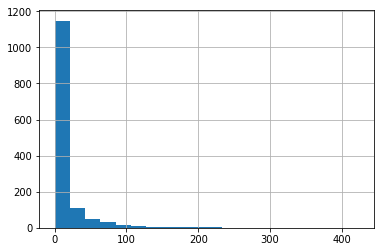

In [153]:
df_outliers_cnt.apply(lambda row : row['purchase_cnt_hist_domestic'] / row['purchase_cnt_hist_foreign'], axis = 1).hist(bins=20)

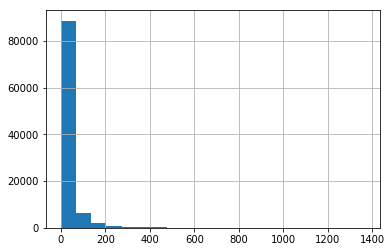

In [154]:
df_inliers_cnt.apply(lambda row : row['purchase_cnt_hist_domestic'] / row['purchase_cnt_hist_foreign'], axis = 1).hist(bins=20)

In [155]:
df9 = data_outliers[data_outliers['state_id'].notnull()].groupby(['card_id', 'foreign_purchase']
                                                                ).purchase_amount.mean().reset_index()
df10 = newdata_outliers[newdata_outliers['state_id'].notnull()].groupby(['card_id', 'foreign_purchase']
                                                                      ).purchase_amount.mean().reset_index()

df_outliers_avg = df9.merge(df10, how = 'outer', on = ['card_id', 'foreign_purchase'])

df_outliers_avg.head()

,card_id,foreign_purchase,purchase_amount_x,purchase_amount_y
0,C_ID_001982552a,0,-0.672688,-0.590525
1,C_ID_001982552a,1,-0.611248,-0.537739
2,C_ID_0029d52418,0,-0.708610,NaN
3,C_ID_0029d52418,1,-0.718559,-0.701828
4,C_ID_0046b2b355,0,-0.640668,-0.671775


In [156]:
df11 = data_inliers[data_inliers['state_id'].notnull()].groupby(['card_id', 'foreign_purchase']
                                                                ).purchase_amount.mean().reset_index()
df12 = newdata_inliers[newdata_inliers['state_id'].notnull()].groupby(['card_id', 'foreign_purchase']
                                                                      ).purchase_amount.mean().reset_index()

df_inliers_avg = df11.merge(df12, how = 'outer', on = ['card_id', 'foreign_purchase'])

df_inliers_avg.head()

,card_id,foreign_purchase,purchase_amount_x,purchase_amount_y
0,C_ID_00007093c1,0,-0.469471,-0.664262
1,C_ID_00007093c1,1,-0.715680,NaN
2,C_ID_0001506ef0,0,-0.524271,-0.723677
3,C_ID_000183fdda,0,-0.512271,-0.599162
4,C_ID_000183fdda,1,0.720007,NaN


In [157]:
df_outliers_avg[df_outliers_avg['foreign_purchase'] == 1].describe()

,foreign_purchase,purchase_amount_x,purchase_amount_y
count,1494.0,1447.000000,472.000000
mean,1.0,-0.455393,-0.343955
std,0.0,0.560574,1.019471
min,1.0,-0.746156,-0.746893
25%,1.0,-0.699878,-0.712403
50%,1.0,-0.625981,-0.623822
75%,1.0,-0.427646,-0.387102
max,1.0,7.113905,14.429839


In [158]:
df_inliers_avg[df_inliers_avg['foreign_purchase'] == 1].describe()

,foreign_purchase,purchase_amount_x,purchase_amount_y
count,108281.0,102336.000000,37197.000000
mean,1.0,-0.223437,-0.334031
std,0.0,25.407181,1.029856
min,1.0,-0.746893,-0.746893
25%,1.0,-0.698327,-0.709342
50%,1.0,-0.598001,-0.625193
75%,1.0,-0.336036,-0.386512
max,1.0,7889.404981,31.935605


In [159]:
df_outliers_avg[df_outliers_avg['foreign_purchase'] == 0].describe()

,foreign_purchase,purchase_amount_x,purchase_amount_y
count,2145.0,2139.000000,1511.000000
mean,0.0,1.176211,-0.523507
std,0.0,69.883023,0.469804
min,0.0,-0.740780,-0.746893
25%,0.0,-0.674531,-0.700008
50%,0.0,-0.617441,-0.647292
75%,0.0,-0.495765,-0.540819
max,0.0,3226.854906,7.549253


In [160]:
df_inliers_avg[df_inliers_avg['foreign_purchase'] == 0].describe()

,foreign_purchase,purchase_amount_x,purchase_amount_y
count,196882.0,196175.000000,172843.000000
mean,0.0,2.546976,-0.533960
std,0.0,1131.420522,0.550962
min,0.0,-0.746758,-0.746893
25%,0.0,-0.679610,-0.693241
50%,0.0,-0.623988,-0.644264
75%,0.0,-0.510358,-0.541237
max,0.0,500883.004724,44.182362


In [161]:
df_outliers_foreign_avg = df_outliers_avg[df_outliers_avg['foreign_purchase'] == 1].copy()
df_outliers_domestic_avg = df_outliers_avg[df_outliers_avg['foreign_purchase'] == 0].copy()
df_outliers_foreign_avg.columns = ['card_id', 'foreign_purchase', 'purchase_avg_hist_foreign', 'purchase_avg_new_foreign']
df_outliers_domestic_avg.columns = ['card_id', 'foreign_purchase', 'purchase_avg_hist_domestic', 'purchase_avg_new_domestic']
df_outliers_foreign_avg.drop('foreign_purchase', inplace = True, axis = 1)
df_outliers_domestic_avg.drop('foreign_purchase', inplace = True, axis = 1)
df_outliers_avg = df_outliers_foreign_avg.merge(df_outliers_domestic_avg, how = 'outer', on = 'card_id')
df_outliers_avg.head()

,card_id,purchase_avg_hist_foreign,purchase_avg_new_foreign,purchase_avg_hist_domestic,purchase_avg_new_domestic
0,C_ID_001982552a,-0.611248,-0.537739,-0.672688,-0.590525
1,C_ID_0029d52418,-0.718559,-0.701828,-0.708610,NaN
2,C_ID_0050fc55c0,-0.567491,NaN,-0.647277,NaN
3,C_ID_0089a52031,-0.511716,-0.634359,-0.087650,-0.506356
4,C_ID_00edc3973c,1.211270,NaN,0.071796,0.088566


In [162]:
df_inliers_foreign_avg = df_inliers_avg[df_inliers_avg['foreign_purchase'] == 1].copy()
df_inliers_domestic_avg = df_inliers_avg[df_inliers_avg['foreign_purchase'] == 0].copy()
df_inliers_foreign_avg.columns = ['card_id', 'foreign_purchase', 'purchase_avg_hist_foreign', 'purchase_avg_new_foreign']
df_inliers_domestic_avg.columns = ['card_id', 'foreign_purchase', 'purchase_avg_hist_domestic', 'purchase_avg_new_domestic']
df_inliers_foreign_avg.drop('foreign_purchase', inplace = True, axis = 1)
df_inliers_domestic_avg.drop('foreign_purchase', inplace = True, axis = 1)
df_inliers_avg = df_inliers_foreign_avg.merge(df_inliers_domestic_avg, how = 'outer', on = 'card_id')
df_inliers_avg.head()

,card_id,purchase_avg_hist_foreign,purchase_avg_new_foreign,purchase_avg_hist_domestic,purchase_avg_new_domestic
0,C_ID_00007093c1,-0.715680,NaN,-0.469471,-0.664262
1,C_ID_000183fdda,0.720007,NaN,-0.512271,-0.599162
2,C_ID_0003be3c83,-0.360061,NaN,-0.661026,-0.573552
3,C_ID_00042d509c,-0.690554,-0.467264,-0.517273,-0.720687
4,C_ID_0004888ddd,-0.740897,NaN,-0.703729,-0.693113


In [163]:
df_outliers_avg.describe()

,purchase_avg_hist_foreign,purchase_avg_new_foreign,purchase_avg_hist_domestic,purchase_avg_new_domestic
count,1447.000000,472.000000,2139.000000,1511.000000
mean,-0.455393,-0.343955,1.176211,-0.523507
std,0.560574,1.019471,69.883023,0.469804
min,-0.746156,-0.746893,-0.740780,-0.746893
25%,-0.699878,-0.712403,-0.674531,-0.700008
50%,-0.625981,-0.623822,-0.617441,-0.647292
75%,-0.427646,-0.387102,-0.495765,-0.540819
max,7.113905,14.429839,3226.854906,7.549253


In [164]:
df_inliers_avg.describe()

,purchase_avg_hist_foreign,purchase_avg_new_foreign,purchase_avg_hist_domestic,purchase_avg_new_domestic
count,102336.000000,37197.000000,196175.000000,172843.000000
mean,-0.223437,-0.334031,2.546976,-0.533960
std,25.407181,1.029856,1131.420522,0.550962
min,-0.746893,-0.746893,-0.746758,-0.746893
25%,-0.698327,-0.709342,-0.679610,-0.693241
50%,-0.598001,-0.625193,-0.623988,-0.644264
75%,-0.336036,-0.386512,-0.510358,-0.541237
max,7889.404981,31.935605,500883.004724,44.182362


In [165]:
df_inliers_avg[df_inliers_avg['purchase_avg_hist_domestic'] < 500000].describe()

,purchase_avg_hist_foreign,purchase_avg_new_foreign,purchase_avg_hist_domestic,purchase_avg_new_domestic
count,98801.000000,35836.000000,196174.000000,172135.000000
mean,-0.217130,-0.333867,-0.006270,-0.535223
std,25.857389,1.030489,35.141406,0.544907
min,-0.746893,-0.746893,-0.746758,-0.746893
25%,-0.698529,-0.709598,-0.679610,-0.693238
50%,-0.597723,-0.625812,-0.623989,-0.644397
75%,-0.334792,-0.386422,-0.510361,-0.541697
max,7889.404981,31.935605,10365.780415,44.182362


In [166]:
df_inliers_avg[df_inliers_avg['purchase_avg_hist_domestic'] > 500000]

,card_id,purchase_avg_hist_foreign,purchase_avg_new_foreign,purchase_avg_hist_domestic,purchase_avg_new_domestic
129424,C_ID_3b6ac8e52d,NaN,NaN,500883.004724,-0.672235


In [167]:
hist[hist['card_id'] == 'C_ID_3b6ac8e52d']

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
29050356,Y,C_ID_3b6ac8e52d,231,N,0,A,705,M_ID_25e9e3043a,0,-7.275236e-01,2017-07-28 09:34:37,1.0,9,33
29050357,Y,C_ID_3b6ac8e52d,231,N,0,A,489,M_ID_df298c39a7,0,-7.288760e-01,2017-07-28 09:32:25,1.0,9,16
29050358,Y,C_ID_3b6ac8e52d,69,N,0,A,683,M_ID_22eeb27f6c,0,-7.423998e-01,2017-07-03 08:52:34,1.0,9,34
29050359,Y,C_ID_3b6ac8e52d,231,N,0,A,80,M_ID_5ba019a379,-2,-7.251194e-01,2017-05-13 12:25:43,1.0,9,37
29050360,N,C_ID_3b6ac8e52d,69,N,0,A,683,M_ID_ee49262ab5,-3,6.010604e+06,2017-04-23 06:58:58,1.0,9,34
29050361,Y,C_ID_3b6ac8e52d,231,N,0,A,705,M_ID_1d7f00ffb5,0,-7.255251e-01,2017-07-28 09:44:56,1.0,9,33
29050362,Y,C_ID_3b6ac8e52d,231,N,0,A,705,M_ID_de98b1e94e,0,-7.085601e-01,2017-07-29 13:07:34,1.0,9,33
29050363,Y,C_ID_3b6ac8e52d,231,N,0,A,80,M_ID_5ba019a379,-3,-7.378919e-01,2017-04-28 16:24:56,1.0,9,37
29050364,Y,C_ID_3b6ac8e52d,231,N,0,A,528,M_ID_188e75244b,0,-7.258707e-01,2017-07-28 17:47:41,1.0,9,25
29050365,Y,C_ID_3b6ac8e52d,231,N,0,A,367,M_ID_fff0c467ae,0,-7.423998e-01,2017-07-14 09:31:02,1.0,9,16
